## What are you to do?
1.You will have a dataset

2.Find the cheapest andd expenses flight at a specific time

3.You have to go through EDA

4.ML Model

5.Find a sweet spot for a cheap ticket
- Ahmed is a customer of Sastaticket.pk. He is planning to fly from Karachi to Islamabad for his
brother’s wedding and is currently in the process of choosing tickets. Ahmed has to go to
Islamabad but Ahmed also wants to save some money in the process, so he chooses to wait
instead of buy now, simply because ticket prices are just too high.
- Is this the right decision? Won’t ticket prices increase in the future? Perhaps there is a
sweet-spot Ahmed is hoping to find and maybe he just might find it.
- This is the problem that you will be tackling in this competition. Can you predict future prices
accurately to such a degree that you can now tell Ahmed - with confidence - that he has made
the wrong decision.
- Your task boils down to generating optimal predictions for flight prices of multiple airlines. If
successful, your model will contribute greatly to Sastaticket’s rich and diverse set of operating
algorithms.

In [217]:
# import libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Dataset X includes the following features:
- f1: Ticket Purchase Date Time
- f2: Origin
- f3: Destination
- f4: Departure Date Time
- f5: Arrival Date Time
- f6: Airline
- f7: Refundable Ticket
- f8: Baggage Weight
- f9: Baggage Pieces
- f10: Flight Number
Dataset Y will have the following variables:
- Target


In [218]:
df = pd.read_csv("sastaticket_train.csv")
df.head()

,Unnamed: 0,Unnamed: 0.1,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,Unnamed: 0.2,target
0,276919,276919,2021-01-08 12:43:27.828728+00:00,x,y,2021-01-23 05:00:00+00:00,2021-01-23 07:00:00+00:00,gamma,True,0.0,0,c-2,276919,7400.0
1,12092463,12092463,2021-07-01 04:45:11.397541+00:00,x,y,2021-07-01 13:00:00+00:00,2021-07-01 15:00:00+00:00,alpha,True,35.0,1,a-9,12092463,15377.0
2,11061788,11061788,2021-06-24 11:28:47.565115+00:00,x,y,2021-07-29 14:00:00+00:00,2021-07-29 16:00:00+00:00,gamma,True,20.0,1,c-4,11061788,6900.0
3,8799808,8799808,2021-06-05 11:09:48.655927+00:00,x,y,2021-06-09 16:00:00+00:00,2021-06-09 18:00:00+00:00,alpha,True,15.0,1,a-23,8799808,9707.0
4,16391150,16391150,2021-07-29 09:53:51.065306+00:00,x,y,2021-08-23 05:00:00+00:00,2021-08-23 06:55:00+00:00,beta,True,20.0,0,b-1,16391150,6500.0


## Exploratory data analysis

In [219]:
# shape
df.shape

(5000, 14)

In [220]:
print("rows , column",df.shape)


rows , column (5000, 14)


In [221]:
df.isnull().sum()

Unnamed: 0      0
Unnamed: 0.1    0
f1              0
f2              0
f3              0
f4              0
f5              0
f6              0
f7              0
f8              0
f9              0
f10             0
Unnamed: 0.2    0
target          0
dtype: int64

In [222]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,f8,f9,Unnamed: 0.2,target
count,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5.000000e+03,5000.000000
mean,1.086293e+07,1.086293e+07,22.494400,0.944600,1.086293e+07,10104.351800
std,6.275456e+06,6.275456e+06,8.887101,0.607951,6.275456e+06,3359.936118
min,2.499000e+03,2.499000e+03,0.000000,0.000000,2.499000e+03,4990.000000
25%,5.417290e+06,5.417290e+06,20.000000,1.000000,5.417290e+06,7796.000000
50%,1.093803e+07,1.093803e+07,20.000000,1.000000,1.093803e+07,9403.000000
75%,1.621582e+07,1.621582e+07,32.000000,1.000000,1.621582e+07,11245.000000
max,2.177443e+07,2.177443e+07,45.000000,2.000000,2.177443e+07,33720.000000


In [223]:
print(df.columns)

Index(['Unnamed: 0', 'Unnamed: 0.1', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7',
       'f8', 'f9', 'f10', 'Unnamed: 0.2', 'target'],
      dtype='object')


In [224]:
cat_list=["f2","f3","f6","f8","f9","f10"]

for i in cat_list:
    print(i,df[i].unique())
    print("---------------------------------------")


f2 ['x']
---------------------------------------
f3 ['y']
---------------------------------------
f6 ['gamma' 'alpha' 'beta' 'omega']
---------------------------------------
f8 [ 0. 35. 20. 15. 32. 40. 45.]
---------------------------------------
f9 [0 1 2]
---------------------------------------
f10 ['c-2' 'a-9' 'c-4' 'a-23' 'b-1' 'a-5' 'b-9' 'a-7' 'd-1' 'c-6' 'a-1' 'd-5'
 'b-69' 'b-19' 'd-3' 'b-319' 'b-369' 'b-67' 'b-73']
---------------------------------------


we will remove f2 and f3 beacuse they dont have any unique values

  we will also remove f10 beacuse airline no doesnt affect the ticket price

In [225]:
df.drop(["f2","f3","Unnamed: 0"],axis=1,inplace=True)
df.head()

,Unnamed: 0.1,f1,f4,f5,f6,f7,f8,f9,f10,Unnamed: 0.2,target
0,276919,2021-01-08 12:43:27.828728+00:00,2021-01-23 05:00:00+00:00,2021-01-23 07:00:00+00:00,gamma,True,0.0,0,c-2,276919,7400.0
1,12092463,2021-07-01 04:45:11.397541+00:00,2021-07-01 13:00:00+00:00,2021-07-01 15:00:00+00:00,alpha,True,35.0,1,a-9,12092463,15377.0
2,11061788,2021-06-24 11:28:47.565115+00:00,2021-07-29 14:00:00+00:00,2021-07-29 16:00:00+00:00,gamma,True,20.0,1,c-4,11061788,6900.0
3,8799808,2021-06-05 11:09:48.655927+00:00,2021-06-09 16:00:00+00:00,2021-06-09 18:00:00+00:00,alpha,True,15.0,1,a-23,8799808,9707.0
4,16391150,2021-07-29 09:53:51.065306+00:00,2021-08-23 05:00:00+00:00,2021-08-23 06:55:00+00:00,beta,True,20.0,0,b-1,16391150,6500.0


In [226]:
# type casting
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  5000 non-null   int64  
 1   f1            5000 non-null   object 
 2   f4            5000 non-null   object 
 3   f5            5000 non-null   object 
 4   f6            5000 non-null   object 
 5   f7            5000 non-null   bool   
 6   f8            5000 non-null   float64
 7   f9            5000 non-null   int64  
 8   f10           5000 non-null   object 
 9   Unnamed: 0.2  5000 non-null   int64  
 10  target        5000 non-null   float64
dtypes: bool(1), float64(2), int64(3), object(5)
memory usage: 395.6+ KB


In [227]:
# convert f1 f4 f5 inti date and time
from datetime import date, datetime
df["f1"] = pd.to_datetime(df["f1"])
df["f4"] = pd.to_datetime(df["f4"])
df["f5"] = pd.to_datetime(df["f5"])

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   Unnamed: 0.1  5000 non-null   int64              
 1   f1            5000 non-null   datetime64[ns, UTC]
 2   f4            5000 non-null   datetime64[ns, UTC]
 3   f5            5000 non-null   datetime64[ns, UTC]
 4   f6            5000 non-null   object             
 5   f7            5000 non-null   bool               
 6   f8            5000 non-null   float64            
 7   f9            5000 non-null   int64              
 8   f10           5000 non-null   object             
 9   Unnamed: 0.2  5000 non-null   int64              
 10  target        5000 non-null   float64            
dtypes: bool(1), datetime64[ns, UTC](3), float64(2), int64(3), object(2)
memory usage: 395.6+ KB


In [229]:
# adding column after subtracting
df.insert(0, "time_to_depart(s)",((df["f4"]-df["f1"]).astype("timedelta64[s]")),True)
df.insert(1, "travel_time(s)",((df["f5"]-df["f4"]).astype("timedelta64[s]")),True)

In [230]:
df.head()

,time_to_depart(s),travel_time(s),Unnamed: 0.1,f1,f4,f5,f6,f7,f8,f9,f10,Unnamed: 0.2,target
0,1268192.0,7200.0,276919,2021-01-08 12:43:27.828728+00:00,2021-01-23 05:00:00+00:00,2021-01-23 07:00:00+00:00,gamma,True,0.0,0,c-2,276919,7400.0
1,29688.0,7200.0,12092463,2021-07-01 04:45:11.397541+00:00,2021-07-01 13:00:00+00:00,2021-07-01 15:00:00+00:00,alpha,True,35.0,1,a-9,12092463,15377.0
2,3033072.0,7200.0,11061788,2021-06-24 11:28:47.565115+00:00,2021-07-29 14:00:00+00:00,2021-07-29 16:00:00+00:00,gamma,True,20.0,1,c-4,11061788,6900.0
3,363011.0,7200.0,8799808,2021-06-05 11:09:48.655927+00:00,2021-06-09 16:00:00+00:00,2021-06-09 18:00:00+00:00,alpha,True,15.0,1,a-23,8799808,9707.0
4,2142368.0,6900.0,16391150,2021-07-29 09:53:51.065306+00:00,2021-08-23 05:00:00+00:00,2021-08-23 06:55:00+00:00,beta,True,20.0,0,b-1,16391150,6500.0


In [231]:
df.drop(["Unnamed: 0.1","Unnamed: 0.2"],axis=1,inplace=True)

In [232]:
df.head()

,time_to_depart(s),travel_time(s),f1,f4,f5,f6,f7,f8,f9,f10,target
0,1268192.0,7200.0,2021-01-08 12:43:27.828728+00:00,2021-01-23 05:00:00+00:00,2021-01-23 07:00:00+00:00,gamma,True,0.0,0,c-2,7400.0
1,29688.0,7200.0,2021-07-01 04:45:11.397541+00:00,2021-07-01 13:00:00+00:00,2021-07-01 15:00:00+00:00,alpha,True,35.0,1,a-9,15377.0
2,3033072.0,7200.0,2021-06-24 11:28:47.565115+00:00,2021-07-29 14:00:00+00:00,2021-07-29 16:00:00+00:00,gamma,True,20.0,1,c-4,6900.0
3,363011.0,7200.0,2021-06-05 11:09:48.655927+00:00,2021-06-09 16:00:00+00:00,2021-06-09 18:00:00+00:00,alpha,True,15.0,1,a-23,9707.0
4,2142368.0,6900.0,2021-07-29 09:53:51.065306+00:00,2021-08-23 05:00:00+00:00,2021-08-23 06:55:00+00:00,beta,True,20.0,0,b-1,6500.0


In [233]:
df.isnull().sum()

time_to_depart(s)    0
travel_time(s)       0
f1                   0
f4                   0
f5                   0
f6                   0
f7                   0
f8                   0
f9                   0
f10                  0
target               0
dtype: int64

In [234]:
cat_cols = ["f6","f7","f8","f9"]
num_cols = ["time_to_depart(s)","travel_time(s)"]

C:\Users\FURQAN JAVED\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\FURQAN JAVED\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\FURQAN JAVED\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an 

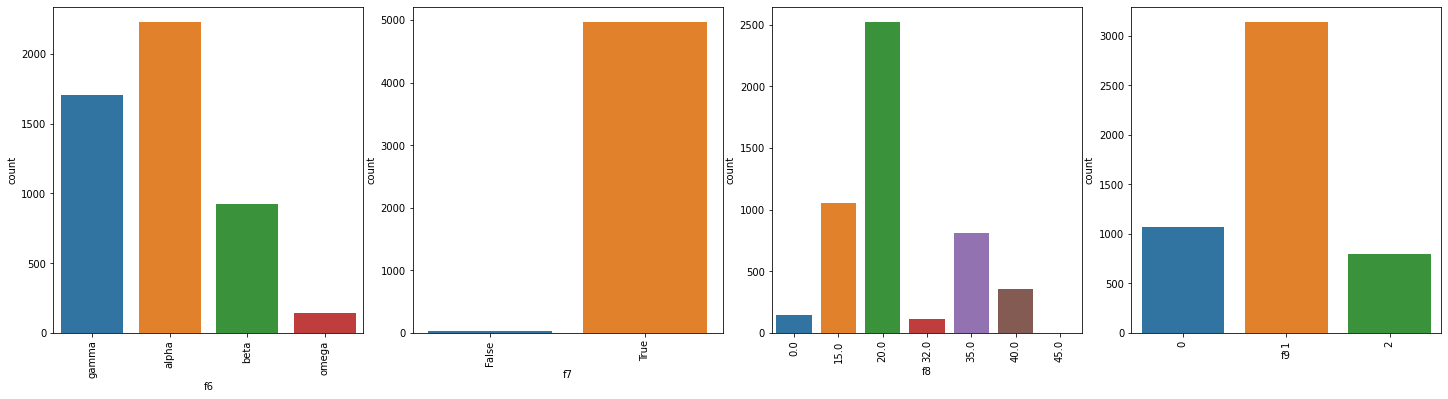

In [235]:
# plotting
c=1
plt.figure(figsize = ( 20,10))
for i in cat_cols:
    plt.subplot(2,4,c)
    sns.countplot(df[i])
    plt.xticks(rotation =90)
    plt.tight_layout(pad= 0.3)
    c=c+1
plt.show()


C:\Users\FURQAN JAVED\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\FURQAN JAVED\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


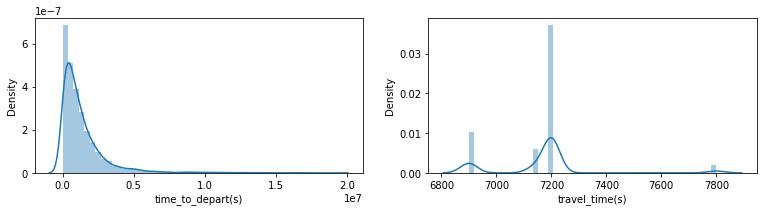

In [236]:
c=1
plt.figure(figsize = ( 20,20))
for i in num_cols:
    plt.subplot(6,3,c)
    sns.distplot(df[i])
    c=c+1
plt.show()

C:\Users\FURQAN JAVED\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='target', ylabel='Density'>

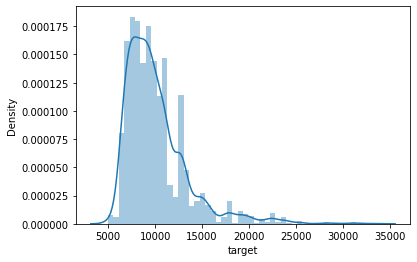

In [237]:
# plottting target
sns.distplot(df["target"])

C:\Users\FURQAN JAVED\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target'>

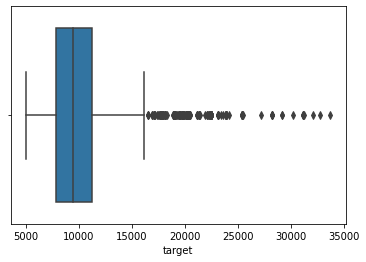

In [238]:
sns.boxplot(df["target"])

- Removing outliers

In [239]:

df = df.drop(df[(df['target']>16000)].index)




C:\Users\FURQAN JAVED\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target'>

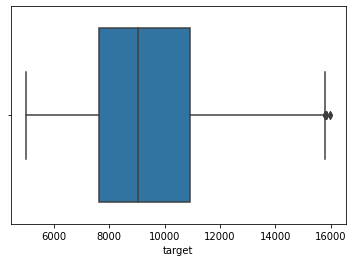

In [240]:
sns.boxplot(df["target"])

In [241]:
# encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [242]:
df["f6"] = le.fit_transform(df["f6"])
df["f7"] = le.fit_transform(df["f7"])
df["f8"] = le.fit_transform(df["f8"])

In [243]:
df.head()

,time_to_depart(s),travel_time(s),f1,f4,f5,f6,f7,f8,f9,f10,target
0,1268192.0,7200.0,2021-01-08 12:43:27.828728+00:00,2021-01-23 05:00:00+00:00,2021-01-23 07:00:00+00:00,2,1,0,0,c-2,7400.0
1,29688.0,7200.0,2021-07-01 04:45:11.397541+00:00,2021-07-01 13:00:00+00:00,2021-07-01 15:00:00+00:00,0,1,4,1,a-9,15377.0
2,3033072.0,7200.0,2021-06-24 11:28:47.565115+00:00,2021-07-29 14:00:00+00:00,2021-07-29 16:00:00+00:00,2,1,2,1,c-4,6900.0
3,363011.0,7200.0,2021-06-05 11:09:48.655927+00:00,2021-06-09 16:00:00+00:00,2021-06-09 18:00:00+00:00,0,1,1,1,a-23,9707.0
4,2142368.0,6900.0,2021-07-29 09:53:51.065306+00:00,2021-08-23 05:00:00+00:00,2021-08-23 06:55:00+00:00,1,1,2,0,b-1,6500.0


In [244]:
df.describe()

,time_to_depart(s),travel_time(s),f6,f7,f8,f9,target
count,4.719000e+03,4719.000000,4719.000000,4719.000000,4719.000000,4719.000000,4719.000000
mean,1.403336e+06,7160.623013,0.948718,0.992371,2.271456,0.934308,9508.219538
std,1.710379e+06,172.653142,0.945930,0.087018,1.239048,0.604076,2221.952798
min,2.003000e+03,6900.000000,0.000000,0.000000,0.000000,0.000000,4990.000000
25%,3.960915e+05,7140.000000,0.000000,1.000000,2.000000,1.000000,7640.000000
50%,9.098110e+05,7200.000000,1.000000,1.000000,2.000000,1.000000,9045.000000
75%,1.776170e+06,7200.000000,2.000000,1.000000,3.000000,1.000000,10900.000000
max,1.916464e+07,7800.000000,3.000000,1.000000,6.000000,2.000000,15980.000000


In [245]:
# normalise
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df["time_to_depart(s)"] = le.fit_transform(df["time_to_depart(s)"])
df["travel_time(s)"] = le.fit_transform(df["travel_time(s)"])
df["target"] = le.fit_transform(df["target"])

In [246]:
df.head()

,time_to_depart(s),travel_time(s),f1,f4,f5,f6,f7,f8,f9,f10,target
0,2946,2,2021-01-08 12:43:27.828728+00:00,2021-01-23 05:00:00+00:00,2021-01-23 07:00:00+00:00,2,1,0,0,c-2,96
1,63,2,2021-07-01 04:45:11.397541+00:00,2021-07-01 13:00:00+00:00,2021-07-01 15:00:00+00:00,0,1,4,1,a-9,461
2,4241,2,2021-06-24 11:28:47.565115+00:00,2021-07-29 14:00:00+00:00,2021-07-29 16:00:00+00:00,2,1,2,1,c-4,60
3,1098,2,2021-06-05 11:09:48.655927+00:00,2021-06-09 16:00:00+00:00,2021-06-09 18:00:00+00:00,0,1,1,1,a-23,264
4,3821,0,2021-07-29 09:53:51.065306+00:00,2021-08-23 05:00:00+00:00,2021-08-23 06:55:00+00:00,1,1,2,0,b-1,24


In [247]:
X = df.drop(["f1","f4","f5","f10","target"],axis=1)

In [248]:
X.head()

,time_to_depart(s),travel_time(s),f6,f7,f8,f9
0,2946,2,2,1,0,0
1,63,2,0,1,4,1
2,4241,2,2,1,2,1
3,1098,2,0,1,1,1
4,3821,0,1,1,2,0


In [249]:
y = df["target"]

In [250]:
y.head()

0     96
1    461
2     60
3    264
4     24
Name: target, dtype: int64

# ML Modelling

In [251]:
# regression pipelines or algos
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# root mean squared error
# rms = mean_absolute_error(y_test,y_pred, squared =False)

In [252]:
# shorten the names
lr = LinearRegression()
dt = DecisionTreeRegressor()
svr = SVR()
knn = KNeighborsRegressor()

In [253]:
# model loop
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

for i in [lr,dt,svr,knn]:  # read all models
    i.fit(X_train,y_train)  # fitting all models
    pred = i.predict(X_test) # predict
    test_score= r2_score(y_test,pred) # test score
    train_score = r2_score(y_train,i.predict(X_train)) # test score
    if abs(train_score-test_score) <=0.1:
        print(i)
        print("R2 score is: ",r2_score(y_test,pred))
        print("Mean absoute error is: ",mean_absolute_error(y_test,pred))
        print("mean squared error is: ",mean_squared_error(y_test,pred))
        print("RMSE is: ",mean_squared_error(y_test,pred, squared = False))
        print("-----------------------------------------")


LinearRegression()
R2 score is:  0.12831776647717363
Mean absoute error is:  102.9744639881735
mean squared error is:  14312.192644704846
RMSE is:  119.63357657741763
-----------------------------------------
SVR()
R2 score is:  0.0075177212204211585
Mean absoute error is:  110.66837736300023
mean squared error is:  16295.61441552201
RMSE is:  127.65427691825296
-----------------------------------------


# Predicting test data

In [254]:
# loading test data
df_test = pd.read_csv("sastaticket_test.csv")
df_test.head()

,Unnamed: 0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10
0,2694449,2021-09-16 12:20:01.578279+00:00,x,y,2021-10-03 04:40:00+00:00,2021-10-03 06:40:00+00:00,omega,True,20.0,1,d-1
1,3088556,2021-09-18 20:13:13.612131+00:00,x,y,2021-09-23 17:05:00+00:00,2021-09-23 19:05:00+00:00,omega,True,20.0,1,d-5
2,3914899,2021-09-24 17:53:41.424953+00:00,x,y,2021-11-10 13:00:00+00:00,2021-11-10 15:00:00+00:00,alpha,True,20.0,1,a-9
3,1139859,2021-09-07 19:39:07.182848+00:00,x,y,2021-09-13 05:00:00+00:00,2021-09-13 06:55:00+00:00,beta,True,40.0,0,b-1
4,594648,2021-09-05 03:48:20.099555+00:00,x,y,2021-09-22 04:00:00+00:00,2021-09-22 06:00:00+00:00,alpha,True,20.0,1,a-1


# EDA on test data

In [255]:
# convert f1 f4 f5 inti date and time
from datetime import date, datetime
df_test["f1"] = pd.to_datetime(df_test["f1"])
df_test["f4"] = pd.to_datetime(df_test["f4"])
df_test["f5"] = pd.to_datetime(df_test["f5"])

In [256]:
# adding column after subtracting
df_test.insert(0, "time_to_depart(s)",((df_test["f4"]-df_test["f1"]).astype("timedelta64[s]")),True)
df_test.insert(1, "travel_time(s)",((df_test["f5"]-df_test["f4"]).astype("timedelta64[s]")),True)

In [257]:
df_test.drop(["Unnamed: 0"],axis=1,inplace=True)

In [258]:
df_test.head()

,time_to_depart(s),travel_time(s),f1,f2,f3,f4,f5,f6,f7,f8,f9,f10
0,1441198.0,7200.0,2021-09-16 12:20:01.578279+00:00,x,y,2021-10-03 04:40:00+00:00,2021-10-03 06:40:00+00:00,omega,True,20.0,1,d-1
1,420706.0,7200.0,2021-09-18 20:13:13.612131+00:00,x,y,2021-09-23 17:05:00+00:00,2021-09-23 19:05:00+00:00,omega,True,20.0,1,d-5
2,4043178.0,7200.0,2021-09-24 17:53:41.424953+00:00,x,y,2021-11-10 13:00:00+00:00,2021-11-10 15:00:00+00:00,alpha,True,20.0,1,a-9
3,465652.0,6900.0,2021-09-07 19:39:07.182848+00:00,x,y,2021-09-13 05:00:00+00:00,2021-09-13 06:55:00+00:00,beta,True,40.0,0,b-1
4,1469499.0,7200.0,2021-09-05 03:48:20.099555+00:00,x,y,2021-09-22 04:00:00+00:00,2021-09-22 06:00:00+00:00,alpha,True,20.0,1,a-1


In [259]:
df_test = df_test.drop(["f1","f2","f3","f4","f5","f10"],axis=1)

In [260]:
df_test.head()

,time_to_depart(s),travel_time(s),f6,f7,f8,f9
0,1441198.0,7200.0,omega,True,20.0,1
1,420706.0,7200.0,omega,True,20.0,1
2,4043178.0,7200.0,alpha,True,20.0,1
3,465652.0,6900.0,beta,True,40.0,0
4,1469499.0,7200.0,alpha,True,20.0,1


In [261]:
# encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_test["f6"] = le.fit_transform(df_test["f6"])
df_test["f7"] = le.fit_transform(df_test["f7"])
df_test["f8"] = le.fit_transform(df_test["f8"])

In [262]:
# normalise
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_test["time_to_depart(s)"] = le.fit_transform(df_test["time_to_depart(s)"])
df_test["travel_time(s)"] = le.fit_transform(df_test["travel_time(s)"])


In [263]:
df_test.head()

,time_to_depart(s),travel_time(s),f6,f7,f8,f9
0,161,2,3,0,1,1
1,71,2,3,0,1,1
2,224,2,0,0,1,1
3,75,0,1,0,2,0
4,162,2,0,0,1,1


In [264]:
# final data predcition

# lr = LinearRegression().fit()
pred = lr.predict(df_test)
# pred
# to save predcition
res = pd.DataFrame(pred)
# res.index = X_test.index
res.columns = ["prediction"]
res.to_csv("predictions_results.csv")



In [269]:
# adding columns for time ain hours
def convert(seconds):
    seconds = seconds % (24*3600)
    hour = seconds // 3600
    seconds %= 3600
    minutes = seconds // 60
    seconds %= 60
    return "%d:%02d:%02d" % ( hour,minutes,seconds)

df["time_1"] = df["time_to_depart(s)"].apply(convert)
df["time_2"] = df["travel_time(s)"].apply(convert)
df.head()

,time_to_depart(s),travel_time(s),f1,f4,f5,f6,f7,f8,f9,f10,target,time_1,time_2
0,2946,2,2021-01-08 12:43:27.828728+00:00,2021-01-23 05:00:00+00:00,2021-01-23 07:00:00+00:00,2,1,0,0,c-2,96,0:49:06,0:00:02
1,63,2,2021-07-01 04:45:11.397541+00:00,2021-07-01 13:00:00+00:00,2021-07-01 15:00:00+00:00,0,1,4,1,a-9,461,0:01:03,0:00:02
2,4241,2,2021-06-24 11:28:47.565115+00:00,2021-07-29 14:00:00+00:00,2021-07-29 16:00:00+00:00,2,1,2,1,c-4,60,1:10:41,0:00:02
3,1098,2,2021-06-05 11:09:48.655927+00:00,2021-06-09 16:00:00+00:00,2021-06-09 18:00:00+00:00,0,1,1,1,a-23,264,0:18:18,0:00:02
4,3821,0,2021-07-29 09:53:51.065306+00:00,2021-08-23 05:00:00+00:00,2021-08-23 06:55:00+00:00,1,1,2,0,b-1,24,1:03:41,0:00:00


In [270]:
df["time_1"].max()

'1:18:33'